<a href="https://colab.research.google.com/github/Girnari/Complete-Python-3-Bootcamp/blob/master/Copy_of_Whiteoak_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm

Download Stock Data

In [ ]:
tickers = ["JUBLFOOD.NS", "DEVYANI.NS"]

data = yf.download(tickers, start="2022-01-01", end="2025-09-01", auto_adjust=True)["Close"]

# Rename for convenience
data.columns = ["Jubilant", "Devyani"]

# Show first few rows
print(data.head())


[*********************100%***********************]  2 of 2 completed

              Jubilant     Devyani
Date                              
2022-01-03  169.350006  724.746582
2022-01-04  172.199997  714.889893
2022-01-05  178.899994  721.484192
2022-01-06  174.050003  709.981323
2022-01-07  186.850006  746.383850


Plot Prices

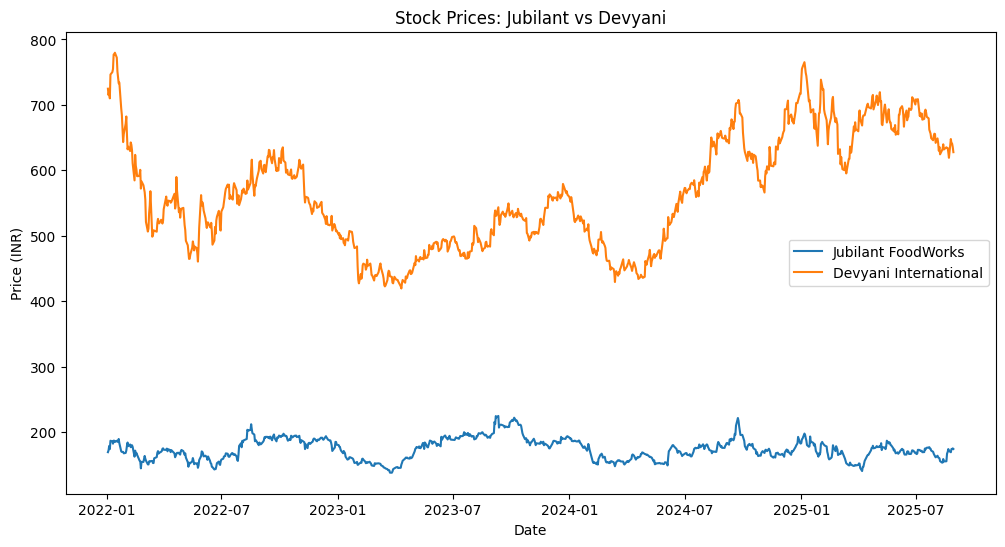

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data["Jubilant"], label="Jubilant FoodWorks")
plt.plot(data.index, data["Devyani"], label="Devyani International")
plt.title("Stock Prices: Jubilant vs Devyani")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.show()

Cointegration Test

In [ ]:
score, p_value, _ = coint(data["Jubilant"], data["Devyani"])
print(f"Engle-Granger Cointegration Test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Jubilant & Devyani are likely cointegrated")
else:
    print("❌ Jubilant & Devyani are not cointegrated")

Engle-Granger Cointegration Test p-value: 0.0258
✅ Jubilant & Devyani are likely cointegrated


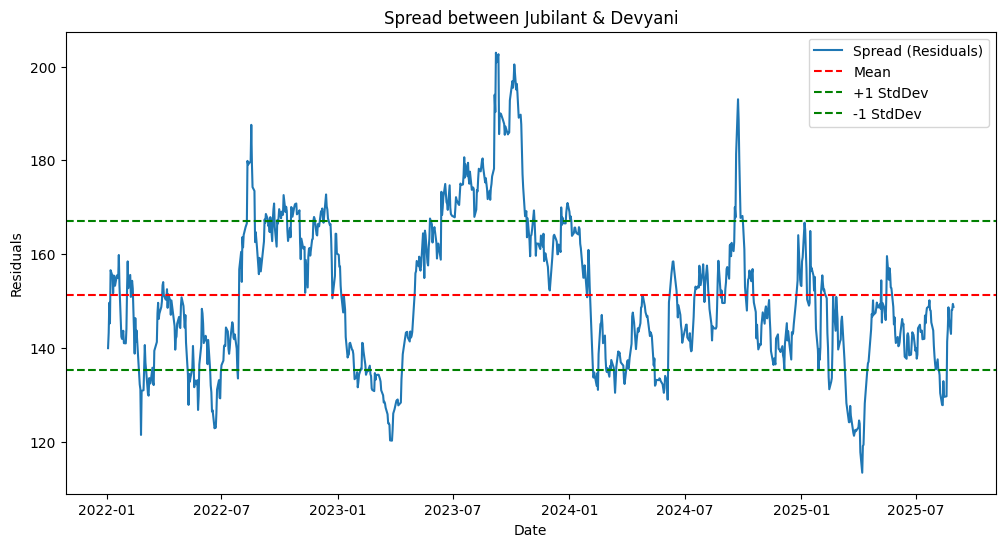

In [ ]:
X = sm.add_constant(data["Devyani"])
model = sm.OLS(data["Jubilant"], X).fit()
hedge_ratio = model.params["Devyani"]

spread = data["Jubilant"] - hedge_ratio * data["Devyani"]

plt.figure(figsize=(12,6))
plt.plot(spread, label="Spread (Residuals)")
plt.axhline(spread.mean(), color="red", linestyle="--", label="Mean")
plt.axhline(spread.mean() + spread.std(), color="green", linestyle="--", label="+1 StdDev")
plt.axhline(spread.mean() - spread.std(), color="green", linestyle="--", label="-1 StdDev")
plt.title("Spread between Jubilant & Devyani")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.legend()
plt.show()

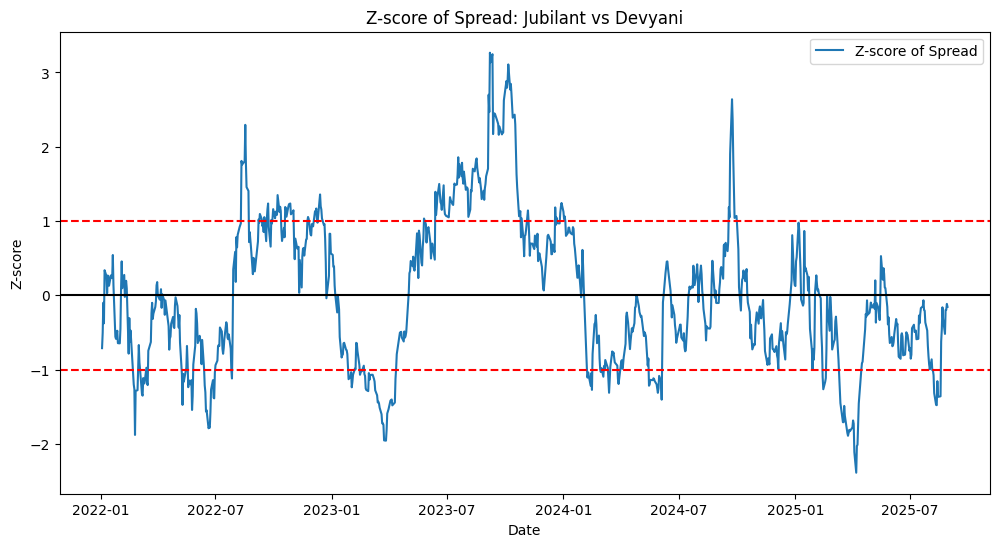

In [ ]:
zscore = (spread - spread.mean()) / spread.std()

plt.figure(figsize=(12,6))
plt.plot(zscore, label="Z-score of Spread")
plt.axhline(0, color="black")
plt.axhline(1, color="red", linestyle="--")
plt.axhline(-1, color="red", linestyle="--")
plt.title("Z-score of Spread: Jubilant vs Devyani")
plt.xlabel("Date")
plt.ylabel("Z-score")
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(spread)
adf_stat = adf_result[0]
adf_pvalue = adf_result[1]

print("--- ADF Test on Spread ---")
print(f"ADF Statistic: {adf_stat:.4f}")
print(f"P-value: {adf_pvalue:.4f}")

if adf_pvalue < 0.05:
    print("✅ The spread is stationary. This supports cointegration and pairs trading strategy.")
else:
    print("❌ The spread is not stationary. Be cautious about pairs trading with these stocks.")

--- ADF Test on Spread ---
ADF Statistic: -3.5794
P-value: 0.0062
✅ The spread is stationary. This supports cointegration and pairs trading strategy.
